In [1]:
import pandas as pd
%matplotlib inline

In [2]:
names = ['center']
df_list = []
for n in names:
    path = 'zahyo/{}.csv'.format(n)
    df_list.append(pd.read_csv(path, names=['name', 'address', 'age', 'rent', 'kanri', 'sikikin', 'reikin', 'kinds', 'area', 'floor', 'x', 'y']))

df = pd.concat(df_list)

In [3]:
df.head()

,name,address,age,rent,kanri,sikikin,reikin,kinds,area,floor,x,y
0,地下鉄東西線 バスセンター前駅 4階建 築4年,北海道札幌市中央区北四条東４,築4年,8万円,6000円,-,8万円,2LDK,57.15m2,4階,43.068026,141.361304
1,Ｒａｆｆｉｎｅ近代美術館前,北海道札幌市中央区北一条西１８,築4年,8万円,4000円,-,-,2LDK,52.64m2,2階,43.059626,141.328823
2,Ｎａｋａｊｉｍａ Ｐａｒｋ Ｓｉｄｅ（旧アンジュ・ソワール）,北海道札幌市中央区南十一条西７,築8年,8.6万円,4000円,8.6万円,-,2LDK,53.38m2,2階,43.044540,141.334281
3,Ｎａｋａｊｉｍａ Ｐａｒｋ Ｓｉｄｅ（旧アンジュ・ソワール）,北海道札幌市中央区南十一条西７,築8年,8.6万円,4000円,8.6万円,-,2LDK,53.38m2,4階,43.044540,141.334281
4,地下鉄南北線 中島公園駅 5階建 築8年,北海道札幌市中央区南十一条西７,築8年,8.6万円,4000円,8.6万円,-,2LDK,53.38m2,2階,43.044540,141.334281


In [4]:
#家賃を数値に変換
df['rent'] = df['rent'].str.strip('万円').astype(float)

#築年数を数値に変換
df['age'] = df['age'].str.replace('新築', '1').str.replace('築', '').str.replace('年', '').str.replace('以上', '').astype(int)

#管理費を数値に変換
df['kanri'] = df['kanri'].str.strip('円').astype(float) / 10000

#階数を数値に変換
df['floor'] = df['floor'].str.replace('階', '')

#広さを数値に変換
df['area'] = df['area'].str.replace('m2', '').astype(float)

#間取りを数値に変換
df.loc[df['kinds']=='ワンルーム', 'kinds'] = str(1)
df['L'] = 0
df['D'] = 0
df['K'] = 0
df['S'] = 0
df.loc[df['kinds'].str[0]=='L', 'L'] = 1
df.loc[df['kinds'].str[1]=='L', 'L'] = 1
df.loc[df['kinds'].str[2]=='L', 'L'] = 1
df.loc[df['kinds'].str[0]=='D', 'D'] = 1
df.loc[df['kinds'].str[1]=='D', 'D'] = 1
df.loc[df['kinds'].str[2]=='D', 'D'] = 1
df.loc[df['kinds'].str[0]=='K', 'K'] = 1
df.loc[df['kinds'].str[1]=='K', 'K'] = 1
df.loc[df['kinds'].str[2]=='K', 'K'] = 1
df.loc[df['kinds'].str[0]=='S', 'S'] = 1
df.loc[df['kinds'].str[1]=='S', 'S'] = 1
df.loc[df['kinds'].str[2]=='S', 'S'] = 1
df['num_rooms'] = df['kinds'].str.replace('L', '').str.replace('D', '').str.replace('K', '').str.replace('S', '').astype(int)
del df['kinds']

#座標削除
del df['sikikin']
del df['reikin']
del df['x']
del df['y']

In [5]:
df

,name,address,age,rent,kanri,area,floor,L,D,K,S,num_rooms
0,地下鉄東西線 バスセンター前駅 4階建 築4年,北海道札幌市中央区北四条東４,4,8.0,0.6,57.15,4,1,1,0,0,2
1,Ｒａｆｆｉｎｅ近代美術館前,北海道札幌市中央区北一条西１８,4,8.0,0.4,52.64,2,1,1,0,0,2
2,Ｎａｋａｊｉｍａ Ｐａｒｋ Ｓｉｄｅ（旧アンジュ・ソワール）,北海道札幌市中央区南十一条西７,8,8.6,0.4,53.38,2,1,1,0,0,2
3,Ｎａｋａｊｉｍａ Ｐａｒｋ Ｓｉｄｅ（旧アンジュ・ソワール）,北海道札幌市中央区南十一条西７,8,8.6,0.4,53.38,4,1,1,0,0,2
4,地下鉄南北線 中島公園駅 5階建 築8年,北海道札幌市中央区南十一条西７,8,8.6,0.4,53.38,2,1,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
82,（仮）宮の森２条８丁目新築,北海道札幌市中央区宮の森二条８,1,8.8,0.5,50.74,2,1,1,0,0,2
83,（仮）宮の森２条８丁目新築,北海道札幌市中央区宮の森二条８,1,8.9,0.5,50.74,3,1,1,0,0,2
84,（仮）宮の森２条８丁目新築,北海道札幌市中央区宮の森二条８,1,9.0,0.5,50.74,4,1,1,0,0,2
85,グランオルセーＳ８,北海道札幌市中央区南八条西１２,7,9.1,0.6,51.75,4,1,1,0,0,2


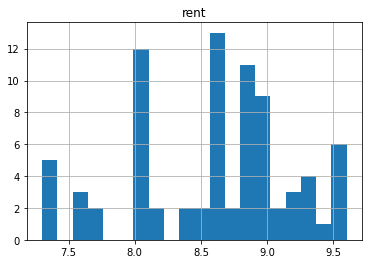

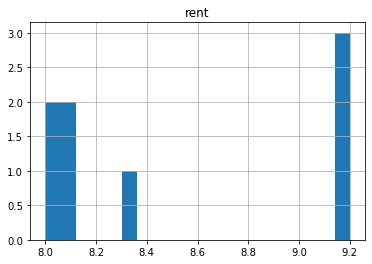

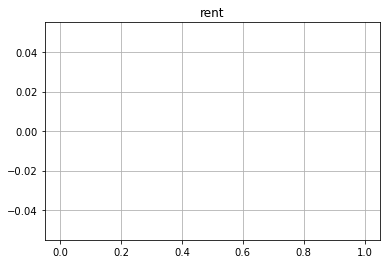

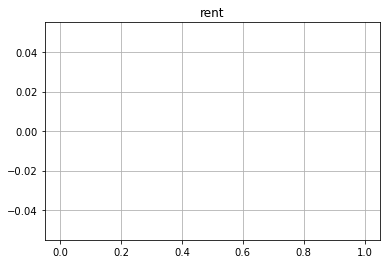

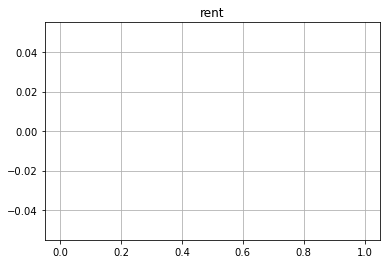

In [6]:
for i in range(5):
    df[['rent']].loc[(df['age'] >= i*10) & (df['age'] < i*10+10) & (df['rent'] < 10)].hist(bins=20)